In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import astropy.stats as AS

%matplotlib inline


## Reading Data, generating In-Sample Scores

In [2]:
name_dict = {'lassoRF_prediction': 'Lasso RF','elastic_prediction': 'Elastic Net','RF_prediction': 'Random Forest',
          'LR_prediction': 'Lasso Regression','weighted_multiRF_prediction': 'Multiple Random Forest',
          'weighted_avrg_prediction': 'Weighted Team Average', 'avrg_prediction': 'Team Average',
          'xgboost_prediction': 'Gradient Boosted Tree'}

In [3]:
training=pd.read_csv('train.csv',index_col = 'challengeID')

In [5]:
name_dict

{'LR_prediction': 'Lasso Regression',
 'RF_prediction': 'Random Forest',
 'avrg_prediction': 'Team Average',
 'drigobon_prediction': 'Lasso RF',
 'eaman_prediction': 'Elastic Net',
 'weighted_avrg_prediction': 'Weighted Team Average',
 'weighted_multiRF_prediction': 'Multiple Random Forest',
 'yoshi_prediction': 'Gradient Boosted Tree'}

In [6]:
bootstrapped_scores_all = {}

In [59]:
    model_name = name_dict[name]
    
    data=pd.read_csv(str(name+'.csv'), index_col = 'challengeID')

    CV_scores = pd.DataFrame(columns = ['outcome','type','model','score_avg'])
    for outcome in training.columns.values:
        y = training[outcome].dropna()
        y_hat = data[outcome][np.in1d(data.index,y.index)]    
        partition_scores = list()

        for i in range(10,110,10):
            bools = y.index<np.percentile(y.index,i)
            y_curr=y[bools]
            y_hat_curr = y_hat[bools]
            partition_scores.append(np.linalg.norm(y_curr-y_hat_curr)/len(y_curr))

        bootstrapped_means = AS.bootstrap(np.array(partition_scores),samples = 10, bootnum = 100, bootfunc = np.mean)
        to_add = pd.DataFrame({'outcome':list(len(bootstrapped_means)*[outcome]),'type':len(bootstrapped_means)*['In-Sample Error'],'model':len(bootstrapped_means)*[model_name],'score_avg':bootstrapped_means})

        CV_scores = CV_scores.append(to_add, ignore_index = True)

In [61]:
partition_scores

[0.031426326376902645,
 0.022110658037597344,
 0.01819453744520699,
 0.016091760095888908,
 0.014447250120502842,
 0.01329844501744574,
 0.012326016551448549,
 0.011525443609239117,
 0.010867320724097136,
 0.010300452711760359]

In [7]:
for name in list(name_dict.keys()):
    model_name = name_dict[name]
    
    data=pd.read_csv(str(name+'.csv'), index_col = 'challengeID')

    CV_scores = pd.DataFrame(columns = ['outcome','type','model','score_avg'])
    for outcome in training.columns.values:
        y = training[outcome].dropna()
        y_hat = data[outcome][np.in1d(data.index,y.index)]    
        partition_scores = list()

        for i in range(10,110,10):
            bools = y.index<np.percentile(y.index,i)
            y_curr=y[bools]
            y_hat_curr = y_hat[bools]
            partition_scores.append(np.linalg.norm(y_curr-y_hat_curr)/len(y_curr))

        bootstrapped_means = AS.bootstrap(np.array(partition_scores),samples = 10, bootnum = 100, bootfunc = np.mean)
        to_add = pd.DataFrame({'outcome':list(len(bootstrapped_means)*[outcome]),'type':len(bootstrapped_means)*['In-Sample Error'],'model':len(bootstrapped_means)*[model_name],'score_avg':bootstrapped_means})

        CV_scores = CV_scores.append(to_add, ignore_index = True)
    bootstrapped_scores_all[name] = CV_scores


In [8]:
GBT_CV = bootstrapped_scores_all['yoshi_prediction']
GBT_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Gradient Boosted Tree'],'score_avg':[0.37543,0.22008,0.02437,0.05453,0.17406,0.19676]})
GBT_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Gradient Boosted Tree'],'score_avg':[0.34379983,0.238180899,0.019950074,0.056877623,0.167392429,0.177202581]})

GBT_scores = GBT_CV.append(GBT_leaderboard.append(GBT_holdout,ignore_index = True),ignore_index = True)

In [9]:
GBT_scores

model           outcome  score_avg             type
0    Gradient Boosted Tree               gpa   0.018126  In-Sample Error
1    Gradient Boosted Tree               gpa   0.017835  In-Sample Error
2    Gradient Boosted Tree               gpa   0.020924  In-Sample Error
3    Gradient Boosted Tree               gpa   0.017499  In-Sample Error
4    Gradient Boosted Tree               gpa   0.020480  In-Sample Error
5    Gradient Boosted Tree               gpa   0.017665  In-Sample Error
6    Gradient Boosted Tree               gpa   0.018133  In-Sample Error
7    Gradient Boosted Tree               gpa   0.022792  In-Sample Error
8    Gradient Boosted Tree               gpa   0.017218  In-Sample Error
9    Gradient Boosted Tree               gpa   0.019306  In-Sample Error
10   Gradient Boosted Tree               gpa   0.022602  In-Sample Error
11   Gradient Boosted Tree               gpa   0.017922  In-Sample Error
12   Gradient Boosted Tree               gpa   0.019694  In-Sample Error
13   Gradient Boosted Tree               gpa   0.021571  In-Sample Error
14   Gradient Boosted Tree               gpa   0.025735  In-Sample Error
15   Gradient Boosted Tree               gpa   0.017812  In-Sample Error
16   Gradient Boosted Tree               gpa   0.022475  In-Sample Error
17   Gradient Boosted Tree               gpa   0.021892  In-Sample Error
18   Gradient Boosted Tree               gpa   0.020498  In-Sample Error
19   Gradient Boosted Tree               gpa   0.019809  In-Sample Error
20   Gradient Boosted Tree               gpa   0.020720  In-Sample Error
21   Gradient Boosted Tree               gpa   0.021843  In-Sample Error
22   Gradient Boosted Tree               gpa   0.020615  In-Sample Error
23   Gradient Boosted Tree               gpa   0.021718  In-Sample Error
24   Gradient Boosted Tree               gpa   0.015612  In-Sample Error
25   Gradient Boosted Tree               gpa   0.015369  In-Sample Error
26   Gradient Boosted Tree               gpa   0.016674  In-Sample Error
27   Gradient Boosted Tree               gpa   0.019191  In-Sample Error
28   Gradient Boosted Tree               gpa   0.021115  In-Sample Error
29   Gradient Boosted Tree               gpa   0.019552  In-Sample Error
..                     ...               ...        ...              ...
582  Gradient Boosted Tree       jobTraining   0.017618  In-Sample Error
583  Gradient Boosted Tree       jobTraining   0.013847  In-Sample Error
584  Gradient Boosted Tree       jobTraining   0.016121  In-Sample Error
585  Gradient Boosted Tree       jobTraining   0.013946  In-Sample Error
586  Gradient Boosted Tree       jobTraining   0.012500  In-Sample Error
587  Gradient Boosted Tree       jobTraining   0.014940  In-Sample Error
588  Gradient Boosted Tree       jobTraining   0.017481  In-Sample Error
589  Gradient Boosted Tree       jobTraining   0.017573  In-Sample Error
590  Gradient Boosted Tree       jobTraining   0.013581  In-Sample Error
591  Gradient Boosted Tree       jobTraining   0.015063  In-Sample Error
592  Gradient Boosted Tree       jobTraining   0.020262  In-Sample Error
593  Gradient Boosted Tree       jobTraining   0.013550  In-Sample Error
594  Gradient Boosted Tree       jobTraining   0.013606  In-Sample Error
595  Gradient Boosted Tree       jobTraining   0.018987  In-Sample Error
596  Gradient Boosted Tree       jobTraining   0.015392  In-Sample Error
597  Gradient Boosted Tree       jobTraining   0.018973  In-Sample Error
598  Gradient Boosted Tree       jobTraining   0.013685  In-Sample Error
599  Gradient Boosted Tree       jobTraining   0.015608  In-Sample Error
600  Gradient Boosted Tree               gpa   0.375430      Leaderboard
601  Gradient Boosted Tree              grit   0.220080      Leaderboard
602  Gradient Boosted Tree  materialHardship   0.024370      Leaderboard
603  Gradient Boosted Tree          eviction   0.054530      Leaderboard
604  Gradient Boosted Tree            layoff   0.174060      Leaderboard
605  G

In [10]:
avrg_CV = bootstrapped_scores_all['avrg_prediction']
avrg_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Team Average'],'score_avg':[0.36587,0.21287,0.02313,0.05025,0.17467,0.20058]})
avrg_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Team Average'],'score_avg':[0.352115776,0.241462042,0.019888218,0.053480264,0.169287396,0.181767792]})

avrg_scores = avrg_CV.append(avrg_leaderboard.append(avrg_holdout,ignore_index = True),ignore_index = True)

In [11]:
avrg_scores

model           outcome  score_avg             type
0    Team Average               gpa   0.016746  In-Sample Error
1    Team Average               gpa   0.016382  In-Sample Error
2    Team Average               gpa   0.018897  In-Sample Error
3    Team Average               gpa   0.014403  In-Sample Error
4    Team Average               gpa   0.019613  In-Sample Error
5    Team Average               gpa   0.016293  In-Sample Error
6    Team Average               gpa   0.018117  In-Sample Error
7    Team Average               gpa   0.015321  In-Sample Error
8    Team Average               gpa   0.015886  In-Sample Error
9    Team Average               gpa   0.013968  In-Sample Error
10   Team Average               gpa   0.018115  In-Sample Error
11   Team Average               gpa   0.017596  In-Sample Error
12   Team Average               gpa   0.017380  In-Sample Error
13   Team Average               gpa   0.020061  In-Sample Error
14   Team Average               gpa   0.017697  In-Sample Error
15   Team Average               gpa   0.020918  In-Sample Error
16   Team Average               gpa   0.014438  In-Sample Error
17   Team Average               gpa   0.015917  In-Sample Error
18   Team Average               gpa   0.016232  In-Sample Error
19   Team Average               gpa   0.017473  In-Sample Error
20   Team Average               gpa   0.016037  In-Sample Error
21   Team Average               gpa   0.014215  In-Sample Error
22   Team Average               gpa   0.018298  In-Sample Error
23   Team Average               gpa   0.016168  In-Sample Error
24   Team Average               gpa   0.018719  In-Sample Error
25   Team Average               gpa   0.015050  In-Sample Error
26   Team Average               gpa   0.017671  In-Sample Error
27   Team Average               gpa   0.016239  In-Sample Error
28   Team Average               gpa   0.018062  In-Sample Error
29   Team Average               gpa   0.016395  In-Sample Error
..            ...               ...        ...              ...
582  Team Average       jobTraining   0.016690  In-Sample Error
583  Team Average       jobTraining   0.014137  In-Sample Error
584  Team Average       jobTraining   0.015564  In-Sample Error
585  Team Average       jobTraining   0.018662  In-Sample Error
586  Team Average       jobTraining   0.019442  In-Sample Error
587  Team Average       jobTraining   0.017335  In-Sample Error
588  Team Average       jobTraining   0.019170  In-Sample Error
589  Team Average       jobTraining   0.017288  In-Sample Error
590  Team Average       jobTraining   0.016399  In-Sample Error
591  Team Average       jobTraining   0.015938  In-Sample Error
592  Team Average       jobTraining   0.019334  In-Sample Error
593  Team Average       jobTraining   0.014378  In-Sample Error
594  Team Average       jobTraining   0.016702  In-Sample Error
595  Team Average       jobTraining   0.016145  In-Sample Error
596  Team Average       jobTraining   0.016624  In-Sample Error
597  Team Average       jobTraining   0.017187  In-Sample Error
598  Team Average       jobTraining   0.019221  In-Sample Error
599  Team Average       jobTraining   0.019536  In-Sample Error
600  Team Average               gpa   0.365870      Leaderboard
601  Team Average              grit   0.212870      Leaderboard
602  Team Average  materialHardship   0.023130      Leaderboard
603  Team Average          eviction   0.050250      Leaderboard
604  Team Average            layoff   0.174670      Leaderboard
605  Team Average       jobTraining   0.200580      Leaderboard
606  Team Average               gpa   0.352116          Holdout
607  Team Average              grit   0.241462          Holdout
608  Team Average  materialHardship   0.019888          Holdout
609  Team Average          eviction   0.053480          Holdout
610  Team Average            layoff   0.169287          Holdout
611  Team Average       jobTraining   0.181768          Holdout

[612 rows x 4 columns]

In [12]:
weighted_avrg_CV = bootstrapped_scores_all['weighted_avrg_prediction']
weighted_avrg_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Weighted Team Average'],'score_avg':[0.36587,0.21287,0.02301,0.04917,0.1696,0.19782]})
weighted_avrg_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Weighted Team Average'],'score_avg':[0.352115776,0.241462042,0.020189616,0.053818827,0.162462938,0.178098036]})

weighted_avrg_scores = weighted_avrg_CV.append(weighted_avrg_leaderboard.append(weighted_avrg_holdout,ignore_index = True),ignore_index = True)

In [13]:
weighted_avrg_scores

model           outcome  score_avg             type
0    Weighted Team Average               gpa   0.019037  In-Sample Error
1    Weighted Team Average               gpa   0.015730  In-Sample Error
2    Weighted Team Average               gpa   0.020436  In-Sample Error
3    Weighted Team Average               gpa   0.019640  In-Sample Error
4    Weighted Team Average               gpa   0.018376  In-Sample Error
5    Weighted Team Average               gpa   0.018167  In-Sample Error
6    Weighted Team Average               gpa   0.019457  In-Sample Error
7    Weighted Team Average               gpa   0.019141  In-Sample Error
8    Weighted Team Average               gpa   0.017447  In-Sample Error
9    Weighted Team Average               gpa   0.018891  In-Sample Error
10   Weighted Team Average               gpa   0.018413  In-Sample Error
11   Weighted Team Average               gpa   0.015386  In-Sample Error
12   Weighted Team Average               gpa   0.020835  In-Sample Error
13   Weighted Team Average               gpa   0.016035  In-Sample Error
14   Weighted Team Average               gpa   0.016165  In-Sample Error
15   Weighted Team Average               gpa   0.017132  In-Sample Error
16   Weighted Team Average               gpa   0.017726  In-Sample Error
17   Weighted Team Average               gpa   0.016381  In-Sample Error
18   Weighted Team Average               gpa   0.020796  In-Sample Error
19   Weighted Team Average               gpa   0.015377  In-Sample Error
20   Weighted Team Average               gpa   0.017591  In-Sample Error
21   Weighted Team Average               gpa   0.015697  In-Sample Error
22   Weighted Team Average               gpa   0.017172  In-Sample Error
23   Weighted Team Average               gpa   0.019770  In-Sample Error
24   Weighted Team Average               gpa   0.017119  In-Sample Error
25   Weighted Team Average               gpa   0.016491  In-Sample Error
26   Weighted Team Average               gpa   0.016064  In-Sample Error
27   Weighted Team Average               gpa   0.017504  In-Sample Error
28   Weighted Team Average               gpa   0.014718  In-Sample Error
29   Weighted Team Average               gpa   0.016320  In-Sample Error
..                     ...               ...        ...              ...
582  Weighted Team Average       jobTraining   0.016245  In-Sample Error
583  Weighted Team Average       jobTraining   0.013155  In-Sample Error
584  Weighted Team Average       jobTraining   0.015650  In-Sample Error
585  Weighted Team Average       jobTraining   0.015451  In-Sample Error
586  Weighted Team Average       jobTraining   0.014763  In-Sample Error
587  Weighted Team Average       jobTraining   0.013699  In-Sample Error
588  Weighted Team Average       jobTraining   0.013266  In-Sample Error
589  Weighted Team Average       jobTraining   0.015886  In-Sample Error
590  Weighted Team Average       jobTraining   0.015315  In-Sample Error
591  Weighted Team Average       jobTraining   0.016779  In-Sample Error
592  Weighted Team Average       jobTraining   0.015997  In-Sample Error
593  Weighted Team Average       jobTraining   0.014574  In-Sample Error
594  Weighted Team Average       jobTraining   0.014272  In-Sample Error
595  Weighted Team Average       jobTraining   0.013984  In-Sample Error
596  Weighted Team Average       jobTraining   0.013765  In-Sample Error
597  Weighted Team Average       jobTraining   0.012384  In-Sample Error
598  Weighted Team Average       jobTraining   0.013298  In-Sample Error
599  Weighted Team Average       jobTraining   0.014862  In-Sample Error
600  Weighted Team Average               gpa   0.365870      Leaderboard
601  Weighted Team Average              grit   0.212870      Leaderboard
602  Weighted Team Average  materialHardship   0.023010      Leaderboard
603  Weighted Team Average          eviction   0.049170      Leaderboard
604  Weighted Team Average            layoff   0.169600      Leaderboard
605  W

In [14]:
multi_RF_CV = bootstrapped_scores_all['weighted_multiRF_prediction']
multi_RF_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Multiple Random Forest'],'score_avg':[0.38766,0.22353,0.02542,0.05446,0.20228,0.22092]})
multi_RF_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Multiple Random Forest'],'score_avg':[0.365114483,0.248124154,0.021174361,0.063930882,0.207400541,0.191352482]})

multi_RF_scores = multi_RF_CV.append(multi_RF_leaderboard.append(multi_RF_holdout,ignore_index = True),ignore_index = True)

In [15]:
multi_RF_scores

model           outcome  score_avg             type
0    Multiple Random Forest               gpa   0.006127  In-Sample Error
1    Multiple Random Forest               gpa   0.009055  In-Sample Error
2    Multiple Random Forest               gpa   0.007713  In-Sample Error
3    Multiple Random Forest               gpa   0.006003  In-Sample Error
4    Multiple Random Forest               gpa   0.006927  In-Sample Error
5    Multiple Random Forest               gpa   0.007751  In-Sample Error
6    Multiple Random Forest               gpa   0.006544  In-Sample Error
7    Multiple Random Forest               gpa   0.008625  In-Sample Error
8    Multiple Random Forest               gpa   0.006021  In-Sample Error
9    Multiple Random Forest               gpa   0.008207  In-Sample Error
10   Multiple Random Forest               gpa   0.005669  In-Sample Error
11   Multiple Random Forest               gpa   0.009303  In-Sample Error
12   Multiple Random Forest               gpa   0.008842  In-Sample Error
13   Multiple Random Forest               gpa   0.009215  In-Sample Error
14   Multiple Random Forest               gpa   0.007524  In-Sample Error
15   Multiple Random Forest               gpa   0.006607  In-Sample Error
16   Multiple Random Forest               gpa   0.006542  In-Sample Error
17   Multiple Random Forest               gpa   0.006297  In-Sample Error
18   Multiple Random Forest               gpa   0.006854  In-Sample Error
19   Multiple Random Forest               gpa   0.008813  In-Sample Error
20   Multiple Random Forest               gpa   0.007356  In-Sample Error
21   Multiple Random Forest               gpa   0.007829  In-Sample Error
22   Multiple Random Forest               gpa   0.006111  In-Sample Error
23   Multiple Random Forest               gpa   0.006895  In-Sample Error
24   Multiple Random Forest               gpa   0.006192  In-Sample Error
25   Multiple Random Forest               gpa   0.006896  In-Sample Error
26   Multiple Random Forest               gpa   0.007559  In-Sample Error
27   Multiple Random Forest               gpa   0.009047  In-Sample Error
28   Multiple Random Forest               gpa   0.007772  In-Sample Error
29   Multiple Random Forest               gpa   0.007152  In-Sample Error
..                      ...               ...        ...              ...
582  Multiple Random Forest       jobTraining   0.014625  In-Sample Error
583  Multiple Random Forest       jobTraining   0.011833  In-Sample Error
584  Multiple Random Forest       jobTraining   0.013500  In-Sample Error
585  Multiple Random Forest       jobTraining   0.013457  In-Sample Error
586  Multiple Random Forest       jobTraining   0.012876  In-Sample Error
587  Multiple Random Forest       jobTraining   0.012618  In-Sample Error
588  Multiple Random Forest       jobTraining   0.015564  In-Sample Error
589  Multiple Random Forest       jobTraining   0.013460  In-Sample Error
590  Multiple Random Forest       jobTraining   0.011978  In-Sample Error
591  Multiple Random Forest       jobTraining   0.010201  In-Sample Error
592  Multiple Random Forest       jobTraining   0.015194  In-Sample Error
593  Multiple Random Forest       jobTraining   0.012638  In-Sample Error
594  Multiple Random Forest       jobTraining   0.013168  In-Sample Error
595  Multiple Random Forest       jobTraining   0.009855  In-Sample Error
596  Multiple Random Forest       jobTraining   0.010245  In-Sample Error
597  Multiple Random Forest       jobTraining   0.012575  In-Sample Error
598  Multiple Random Forest       jobTraining   0.011445  In-Sample Error
599  Multiple Random Forest       jobTraining   0.010497  In-Sample Error
600  Multiple Random Forest               gpa   0.387660      Leaderboard
601  Multiple Random Forest              grit   0.223530      Leaderboard
602  Multiple Random Forest  materialHardship   0.025420      Leaderboard
603  Multiple Random Forest          eviction   0.054460      Leaderboard
604  Multiple Random Fores

In [16]:
LR_CV = bootstrapped_scores_all['LR_prediction']
LR_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Lasso Regression'],'score_avg':[0.37674,0.2244,0.02715,0.05092,0.18341,0.22311]})
LR_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Lasso Regression'],'score_avg':[0.364780108,0.247382526,0.021359837,0.058200047,0.181441591,0.194502527]})

LR_scores = LR_CV.append(LR_leaderboard.append(LR_holdout,ignore_index = True),ignore_index = True)

In [17]:
LR_scores

model           outcome  score_avg             type
0    Lasso Regression               gpa   0.004325  In-Sample Error
1    Lasso Regression               gpa   0.003823  In-Sample Error
2    Lasso Regression               gpa   0.003840  In-Sample Error
3    Lasso Regression               gpa   0.004234  In-Sample Error
4    Lasso Regression               gpa   0.004396  In-Sample Error
5    Lasso Regression               gpa   0.003850  In-Sample Error
6    Lasso Regression               gpa   0.003345  In-Sample Error
7    Lasso Regression               gpa   0.003846  In-Sample Error
8    Lasso Regression               gpa   0.004567  In-Sample Error
9    Lasso Regression               gpa   0.004057  In-Sample Error
10   Lasso Regression               gpa   0.004931  In-Sample Error
11   Lasso Regression               gpa   0.004098  In-Sample Error
12   Lasso Regression               gpa   0.003613  In-Sample Error
13   Lasso Regression               gpa   0.003374  In-Sample Error
14   Lasso Regression               gpa   0.003909  In-Sample Error
15   Lasso Regression               gpa   0.003590  In-Sample Error
16   Lasso Regression               gpa   0.003511  In-Sample Error
17   Lasso Regression               gpa   0.004218  In-Sample Error
18   Lasso Regression               gpa   0.004206  In-Sample Error
19   Lasso Regression               gpa   0.003469  In-Sample Error
20   Lasso Regression               gpa   0.004157  In-Sample Error
21   Lasso Regression               gpa   0.004427  In-Sample Error
22   Lasso Regression               gpa   0.004031  In-Sample Error
23   Lasso Regression               gpa   0.003543  In-Sample Error
24   Lasso Regression               gpa   0.005264  In-Sample Error
25   Lasso Regression               gpa   0.003346  In-Sample Error
26   Lasso Regression               gpa   0.003827  In-Sample Error
27   Lasso Regression               gpa   0.003760  In-Sample Error
28   Lasso Regression               gpa   0.003204  In-Sample Error
29   Lasso Regression               gpa   0.003595  In-Sample Error
..                ...               ...        ...              ...
582  Lasso Regression       jobTraining   0.015749  In-Sample Error
583  Lasso Regression       jobTraining   0.014746  In-Sample Error
584  Lasso Regression       jobTraining   0.013234  In-Sample Error
585  Lasso Regression       jobTraining   0.011592  In-Sample Error
586  Lasso Regression       jobTraining   0.011732  In-Sample Error
587  Lasso Regression       jobTraining   0.013530  In-Sample Error
588  Lasso Regression       jobTraining   0.009874  In-Sample Error
589  Lasso Regression       jobTraining   0.013826  In-Sample Error
590  Lasso Regression       jobTraining   0.011888  In-Sample Error
591  Lasso Regression       jobTraining   0.013567  In-Sample Error
592  Lasso Regression       jobTraining   0.011304  In-Sample Error
593  Lasso Regression       jobTraining   0.015365  In-Sample Error
594  Lasso Regression       jobTraining   0.014830  In-Sample Error
595  Lasso Regression       jobTraining   0.011504  In-Sample Error
596  Lasso Regression       jobTraining   0.011062  In-Sample Error
597  Lasso Regression       jobTraining   0.015512  In-Sample Error
598  Lasso Regression       jobTraining   0.010360  In-Sample Error
599  Lasso Regression       jobTraining   0.016274  In-Sample Error
600  Lasso Regression               gpa   0.376740      Leaderboard
601  Lasso Regression              grit   0.224400      Leaderboard
602  Lasso Regression  materialHardship   0.027150      Leaderboard
603  Lasso Regression          eviction   0.050920      Leaderboard
604  Lasso Regression            layoff   0.183410      Leaderboard
605  Lasso Regression       jobTraining   0.223110      Leaderboard
606  Lasso Regression               gpa   0.364780          Holdout
607  Lasso Regression              grit   0.247383          Holdout
608  Lasso Regression  materialHardship   0.021360          Holdout
609 

In [18]:
RF_CV = bootstrapped_scores_all['RF_prediction']
RF_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Random Forest'],'score_avg':[0.38615,0.22342,0.02547,0.05475,0.20346,0.22135]})
RF_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Random Forest'],'score_avg':[0.364609923,0.247940405,0.021135379,0.064494339,0.208869867,0.191742726]})

RF_scores = RF_CV.append(RF_leaderboard.append(RF_holdout,ignore_index = True),ignore_index = True)

In [19]:
RF_scores

model           outcome  score_avg             type
0    Random Forest               gpa   0.007220  In-Sample Error
1    Random Forest               gpa   0.008177  In-Sample Error
2    Random Forest               gpa   0.006460  In-Sample Error
3    Random Forest               gpa   0.008408  In-Sample Error
4    Random Forest               gpa   0.006348  In-Sample Error
5    Random Forest               gpa   0.007947  In-Sample Error
6    Random Forest               gpa   0.008530  In-Sample Error
7    Random Forest               gpa   0.006557  In-Sample Error
8    Random Forest               gpa   0.007159  In-Sample Error
9    Random Forest               gpa   0.005719  In-Sample Error
10   Random Forest               gpa   0.005295  In-Sample Error
11   Random Forest               gpa   0.006149  In-Sample Error
12   Random Forest               gpa   0.006803  In-Sample Error
13   Random Forest               gpa   0.006460  In-Sample Error
14   Random Forest               gpa   0.005397  In-Sample Error
15   Random Forest               gpa   0.007218  In-Sample Error
16   Random Forest               gpa   0.008506  In-Sample Error
17   Random Forest               gpa   0.007305  In-Sample Error
18   Random Forest               gpa   0.006198  In-Sample Error
19   Random Forest               gpa   0.007278  In-Sample Error
20   Random Forest               gpa   0.006000  In-Sample Error
21   Random Forest               gpa   0.006979  In-Sample Error
22   Random Forest               gpa   0.006713  In-Sample Error
23   Random Forest               gpa   0.007126  In-Sample Error
24   Random Forest               gpa   0.005349  In-Sample Error
25   Random Forest               gpa   0.008486  In-Sample Error
26   Random Forest               gpa   0.006969  In-Sample Error
27   Random Forest               gpa   0.007753  In-Sample Error
28   Random Forest               gpa   0.008053  In-Sample Error
29   Random Forest               gpa   0.006928  In-Sample Error
..             ...               ...        ...              ...
582  Random Forest       jobTraining   0.012229  In-Sample Error
583  Random Forest       jobTraining   0.011170  In-Sample Error
584  Random Forest       jobTraining   0.013978  In-Sample Error
585  Random Forest       jobTraining   0.012805  In-Sample Error
586  Random Forest       jobTraining   0.011588  In-Sample Error
587  Random Forest       jobTraining   0.011096  In-Sample Error
588  Random Forest       jobTraining   0.011548  In-Sample Error
589  Random Forest       jobTraining   0.012556  In-Sample Error
590  Random Forest       jobTraining   0.009972  In-Sample Error
591  Random Forest       jobTraining   0.015324  In-Sample Error
592  Random Forest       jobTraining   0.012133  In-Sample Error
593  Random Forest       jobTraining   0.013000  In-Sample Error
594  Random Forest       jobTraining   0.012632  In-Sample Error
595  Random Forest       jobTraining   0.013052  In-Sample Error
596  Random Forest       jobTraining   0.011377  In-Sample Error
597  Random Forest       jobTraining   0.012551  In-Sample Error
598  Random Forest       jobTraining   0.014380  In-Sample Error
599  Random Forest       jobTraining   0.013916  In-Sample Error
600  Random Forest               gpa   0.386150      Leaderboard
601  Random Forest              grit   0.223420      Leaderboard
602  Random Forest  materialHardship   0.025470      Leaderboard
603  Random Forest          eviction   0.054750      Leaderboard
604  Random Forest            layoff   0.203460      Leaderboard
605  Random Forest       jobTraining   0.221350      Leaderboard
606  Random Forest               gpa   0.364610          Holdout
607  Random Forest              grit   0.247940          Holdout
608  Random Forest  materialHardship   0.021135          Holdout
609  Random Forest          eviction   0.064494          Holdout
610  Random Forest            layoff   0.208870          Holdout
611  Random Forest       jobTraining   0.191743 

In [20]:
lasso_RF_CV = bootstrapped_scores_all['drigobon_prediction']
lasso_RF_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Lasso RF'],'score_avg':[0.37483,0.21686,0.02519,0.05226,0.17223,0.20028]})
lasso_RF_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Lasso RF'],'score_avg':[0.361450643,0.243745261,0.020491841,0.054397319,0.165154165,0.180446409]})

lasso_scores = lasso_RF_CV.append(lasso_RF_leaderboard.append(lasso_RF_holdout,ignore_index = True),ignore_index = True)

In [21]:
lasso_scores

model           outcome  score_avg             type
0    Lasso RF               gpa   0.015967  In-Sample Error
1    Lasso RF               gpa   0.014829  In-Sample Error
2    Lasso RF               gpa   0.014560  In-Sample Error
3    Lasso RF               gpa   0.016021  In-Sample Error
4    Lasso RF               gpa   0.014246  In-Sample Error
5    Lasso RF               gpa   0.013408  In-Sample Error
6    Lasso RF               gpa   0.014627  In-Sample Error
7    Lasso RF               gpa   0.014327  In-Sample Error
8    Lasso RF               gpa   0.013173  In-Sample Error
9    Lasso RF               gpa   0.014732  In-Sample Error
10   Lasso RF               gpa   0.016970  In-Sample Error
11   Lasso RF               gpa   0.017936  In-Sample Error
12   Lasso RF               gpa   0.016368  In-Sample Error
13   Lasso RF               gpa   0.014710  In-Sample Error
14   Lasso RF               gpa   0.016095  In-Sample Error
15   Lasso RF               gpa   0.014527  In-Sample Error
16   Lasso RF               gpa   0.013677  In-Sample Error
17   Lasso RF               gpa   0.015434  In-Sample Error
18   Lasso RF               gpa   0.017215  In-Sample Error
19   Lasso RF               gpa   0.014590  In-Sample Error
20   Lasso RF               gpa   0.015802  In-Sample Error
21   Lasso RF               gpa   0.013331  In-Sample Error
22   Lasso RF               gpa   0.015272  In-Sample Error
23   Lasso RF               gpa   0.015266  In-Sample Error
24   Lasso RF               gpa   0.014983  In-Sample Error
25   Lasso RF               gpa   0.016475  In-Sample Error
26   Lasso RF               gpa   0.015242  In-Sample Error
27   Lasso RF               gpa   0.012309  In-Sample Error
28   Lasso RF               gpa   0.014479  In-Sample Error
29   Lasso RF               gpa   0.011845  In-Sample Error
..        ...               ...        ...              ...
582  Lasso RF       jobTraining   0.016219  In-Sample Error
583  Lasso RF       jobTraining   0.016786  In-Sample Error
584  Lasso RF       jobTraining   0.014819  In-Sample Error
585  Lasso RF       jobTraining   0.018167  In-Sample Error
586  Lasso RF       jobTraining   0.013861  In-Sample Error
587  Lasso RF       jobTraining   0.014670  In-Sample Error
588  Lasso RF       jobTraining   0.015707  In-Sample Error
589  Lasso RF       jobTraining   0.015408  In-Sample Error
590  Lasso RF       jobTraining   0.014863  In-Sample Error
591  Lasso RF       jobTraining   0.013214  In-Sample Error
592  Lasso RF       jobTraining   0.018619  In-Sample Error
593  Lasso RF       jobTraining   0.015002  In-Sample Error
594  Lasso RF       jobTraining   0.016807  In-Sample Error
595  Lasso RF       jobTraining   0.016722  In-Sample Error
596  Lasso RF       jobTraining   0.016711  In-Sample Error
597  Lasso RF       jobTraining   0.016625  In-Sample Error
598  Lasso RF       jobTraining   0.014588  In-Sample Error
599  Lasso RF       jobTraining   0.015473  In-Sample Error
600  Lasso RF               gpa   0.374830      Leaderboard
601  Lasso RF              grit   0.216860      Leaderboard
602  Lasso RF  materialHardship   0.025190      Leaderboard
603  Lasso RF          eviction   0.052260      Leaderboard
604  Lasso RF            layoff   0.172230      Leaderboard
605  Lasso RF       jobTraining   0.200280      Leaderboard
606  Lasso RF               gpa   0.361451          Holdout
607  Lasso RF              grit   0.243745          Holdout
608  Lasso RF  materialHardship   0.020492          Holdout
609  Lasso RF          eviction   0.054397          Holdout
610  Lasso RF            layoff   0.165154          Holdout
611  Lasso RF       jobTraining   0.180446          Holdout

[612 rows x 4 columns]

In [22]:
eNet_CV = bootstrapped_scores_all['eaman_prediction']
eNet_leaderboard = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Leaderboard'],'model':6*['Elastic Net'],'score_avg':[0.36477,0.21252,0.02353,0.05341,0.17435,0.20224]})
eNet_holdout = pd.DataFrame({'outcome':['gpa','grit','materialHardship','eviction','layoff','jobTraining'],'type':6*['Holdout'],'model':6*['Elastic Net'],'score_avg':[0.350083,0.239361,0.019791,0.055458,0.167224,0.185329]})

eNet_scores = eNet_CV.append(eNet_leaderboard.append(eNet_holdout,ignore_index = True),ignore_index = True)

#bools = np.in1d(eNet_scores.outcome,['gpa','grit','materialHardship'])
#eNet_scores = eNet_scores.loc[bools]

In [23]:
eNet_scores

model           outcome  score_avg             type
0    Elastic Net               gpa   0.024929  In-Sample Error
1    Elastic Net               gpa   0.027520  In-Sample Error
2    Elastic Net               gpa   0.027632  In-Sample Error
3    Elastic Net               gpa   0.026345  In-Sample Error
4    Elastic Net               gpa   0.028840  In-Sample Error
5    Elastic Net               gpa   0.019510  In-Sample Error
6    Elastic Net               gpa   0.023956  In-Sample Error
7    Elastic Net               gpa   0.023074  In-Sample Error
8    Elastic Net               gpa   0.022841  In-Sample Error
9    Elastic Net               gpa   0.023391  In-Sample Error
10   Elastic Net               gpa   0.022122  In-Sample Error
11   Elastic Net               gpa   0.021881  In-Sample Error
12   Elastic Net               gpa   0.019747  In-Sample Error
13   Elastic Net               gpa   0.024504  In-Sample Error
14   Elastic Net               gpa   0.024487  In-Sample Error
15   Elastic Net               gpa   0.030451  In-Sample Error
16   Elastic Net               gpa   0.027518  In-Sample Error
17   Elastic Net               gpa   0.025156  In-Sample Error
18   Elastic Net               gpa   0.020571  In-Sample Error
19   Elastic Net               gpa   0.017787  In-Sample Error
20   Elastic Net               gpa   0.021470  In-Sample Error
21   Elastic Net               gpa   0.026272  In-Sample Error
22   Elastic Net               gpa   0.018659  In-Sample Error
23   Elastic Net               gpa   0.023401  In-Sample Error
24   Elastic Net               gpa   0.018153  In-Sample Error
25   Elastic Net               gpa   0.025933  In-Sample Error
26   Elastic Net               gpa   0.021383  In-Sample Error
27   Elastic Net               gpa   0.024651  In-Sample Error
28   Elastic Net               gpa   0.028872  In-Sample Error
29   Elastic Net               gpa   0.024781  In-Sample Error
..           ...               ...        ...              ...
582  Elastic Net       jobTraining   0.015314  In-Sample Error
583  Elastic Net       jobTraining   0.019061  In-Sample Error
584  Elastic Net       jobTraining   0.016347  In-Sample Error
585  Elastic Net       jobTraining   0.015222  In-Sample Error
586  Elastic Net       jobTraining   0.017217  In-Sample Error
587  Elastic Net       jobTraining   0.017203  In-Sample Error
588  Elastic Net       jobTraining   0.015882  In-Sample Error
589  Elastic Net       jobTraining   0.021327  In-Sample Error
590  Elastic Net       jobTraining   0.016237  In-Sample Error
591  Elastic Net       jobTraining   0.017135  In-Sample Error
592  Elastic Net       jobTraining   0.019011  In-Sample Error
593  Elastic Net       jobTraining   0.019810  In-Sample Error
594  Elastic Net       jobTraining   0.018176  In-Sample Error
595  Elastic Net       jobTraining   0.017833  In-Sample Error
596  Elastic Net       jobTraining   0.014650  In-Sample Error
597  Elastic Net       jobTraining   0.016418  In-Sample Error
598  Elastic Net       jobTraining   0.015768  In-Sample Error
599  Elastic Net       jobTraining   0.014679  In-Sample Error
600  Elastic Net               gpa   0.364770      Leaderboard
601  Elastic Net              grit   0.212520      Leaderboard
602  Elastic Net  materialHardship   0.023530      Leaderboard
603  Elastic Net          eviction   0.053410      Leaderboard
604  Elastic Net            layoff   0.174350      Leaderboard
605  Elastic Net       jobTraining   0.202240      Leaderboard
606  Elastic Net               gpa   0.350083          Holdout
607  Elastic Net              grit   0.239361          Holdout
608  Elastic Net  materialHardship   0.019791          Holdout
609  Elastic Net          eviction   0.055458          Holdout
610  Elastic Net            layoff   0.167224          Holdout
611  Elastic Net       jobTraining   0.185329          Holdout

[612 rows x 4 columns]

## Score Aggregation and Plotting

In [24]:
scores = eNet_scores.append(lasso_scores.append(RF_scores.append(LR_scores.append(multi_RF_scores.append(weighted_avrg_scores.append(avrg_scores.append(GBT_scores,ignore_index = True),ignore_index = True),ignore_index = True),ignore_index = True),ignore_index = True),ignore_index = True), ignore_index = True)

In [25]:
scores_noIS = scores.loc[scores.type!='In-Sample Error']

In [55]:
scores_noIS

model           outcome  score_avg         type
600             Elastic Net               gpa   0.364770  Leaderboard
601             Elastic Net              grit   0.212520  Leaderboard
602             Elastic Net  materialHardship   0.023530  Leaderboard
603             Elastic Net          eviction   0.053410  Leaderboard
604             Elastic Net            layoff   0.174350  Leaderboard
605             Elastic Net       jobTraining   0.202240  Leaderboard
606             Elastic Net               gpa   0.350083      Holdout
607             Elastic Net              grit   0.239361      Holdout
608             Elastic Net  materialHardship   0.019791      Holdout
609             Elastic Net          eviction   0.055458      Holdout
610             Elastic Net            layoff   0.167224      Holdout
611             Elastic Net       jobTraining   0.185329      Holdout
1212               Lasso RF               gpa   0.374830  Leaderboard
1213               Lasso RF              grit   0.216860  Leaderboard
1214               Lasso RF  materialHardship   0.025190  Leaderboard
1215               Lasso RF          eviction   0.052260  Leaderboard
1216               Lasso RF            layoff   0.172230  Leaderboard
1217               Lasso RF       jobTraining   0.200280  Leaderboard
1218               Lasso RF               gpa   0.361451      Holdout
1219               Lasso RF              grit   0.243745      Holdout
1220               Lasso RF  materialHardship   0.020492      Holdout
1221               Lasso RF          eviction   0.054397      Holdout
1222               Lasso RF            layoff   0.165154      Holdout
1223               Lasso RF       jobTraining   0.180446      Holdout
1824          Random Forest               gpa   0.386150  Leaderboard
1825          Random Forest              grit   0.223420  Leaderboard
1826          Random Forest  materialHardship   0.025470  Leaderboard
1827          Random Forest          eviction   0.054750  Leaderboard
1828          Random Forest            layoff   0.203460  Leaderboard
1829          Random Forest       jobTraining   0.221350  Leaderboard
...                     ...               ...        ...          ...
3666  Weighted Team Average               gpa   0.352116      Holdout
3667  Weighted Team Average              grit   0.241462      Holdout
3668  Weighted Team Average  materialHardship   0.020190      Holdout
3669  Weighted Team Average          eviction   0.053819      Holdout
3670  Weighted Team Average            layoff   0.162463      Holdout
3671  Weighted Team Average       jobTraining   0.178098      Holdout
4272           Team Average               gpa   0.365870  Leaderboard
4273           Team Average              grit   0.212870  Leaderboard
4274           Team Average  materialHardship   0.023130  Leaderboard
4275           Team Average          eviction   0.050250  Leaderboard
4276           Team Average            layoff   0.174670  Leaderboard
4277           Team Average       jobTraining   0.200580  Leaderboard
4278           Team Average               gpa   0.352116      Holdout
4279           Team Average              grit   0.241462      Holdout
4280           Team Average  materialHardship   0.019888      Holdout
4281           Team Average          eviction   0.053480      Holdout
4282           Team Average            layoff   0.169287      Holdout
4283           Team Average       jobTraining   0.181768      Holdout
4884  Gradient Boosted Tree               gpa   0.375430  Leaderboard
4885  Gradient Boosted Tree              grit   0.220080  Leaderboard
4886  Gradient Boosted Tree  materialHardship   0.024370  Leaderboard
4887  Gradient Boosted Tree          eviction   0.054530  Leaderboard
4888  Gradient Boosted Tree            layoff   0.174060  Leaderboard
4889  Gradient Boosted Tree       jobTraining   0.196760  Leaderboard
4890  Gradient Boosted Tree               gpa   0.343800      Holdout
4891  Gradient Boosted Tree     

gpa
Best Leaderboard Model:  600    Elastic Net
Name: model, dtype: object
Best Holdout Model:  4890    Gradient Boosted Tree
Name: model, dtype: object

grit
Best Leaderboard Model:  601    Elastic Net
Name: model, dtype: object
Best Holdout Model:  4891    Gradient Boosted Tree
Name: model, dtype: object

materialHardship
Best Leaderboard Model:  3662    Weighted Team Average
Name: model, dtype: object
Best Holdout Model:  608    Elastic Net
Name: model, dtype: object

eviction
Best Leaderboard Model:  3663    Weighted Team Average
Name: model, dtype: object
Best Holdout Model:  4281    Team Average
Name: model, dtype: object

layoff
Best Leaderboard Model:  3664    Weighted Team Average
Name: model, dtype: object
Best Holdout Model:  3670    Weighted Team Average
Name: model, dtype: object

jobTraining
Best Leaderboard Model:  4889    Gradient Boosted Tree
Name: model, dtype: object
Best Holdout Model:  4895    Gradient Boosted Tree
Name: model, dtype: object



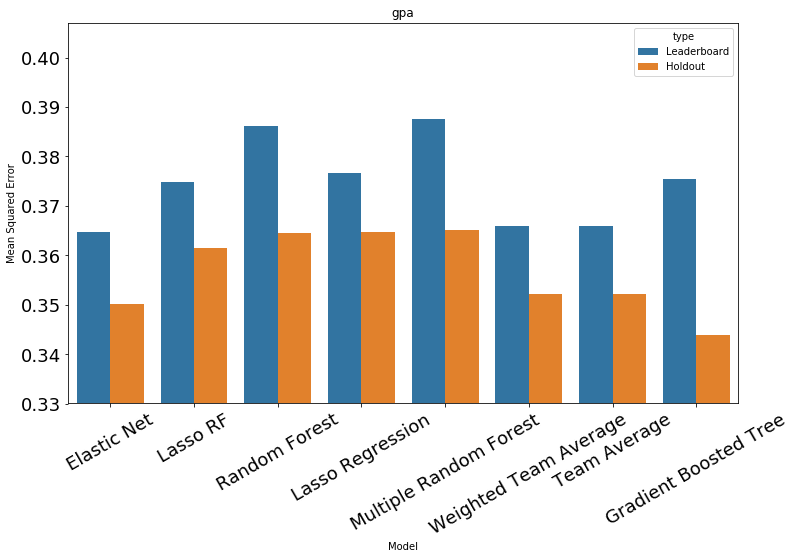

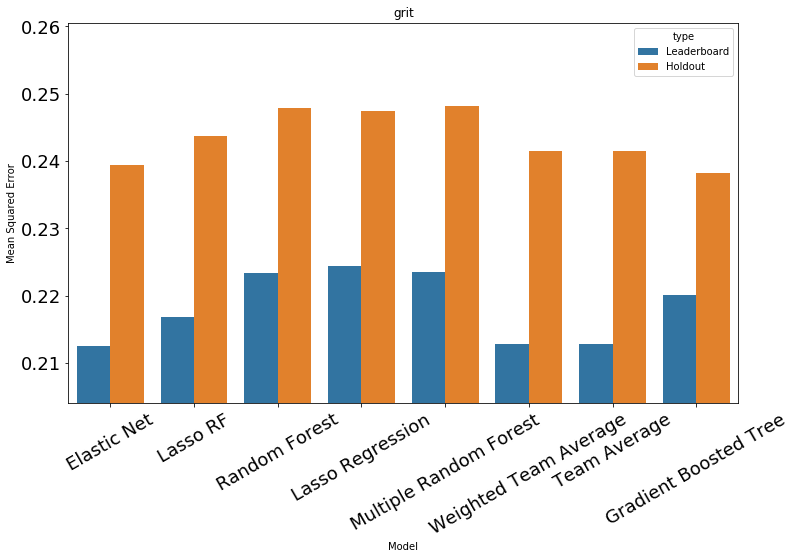

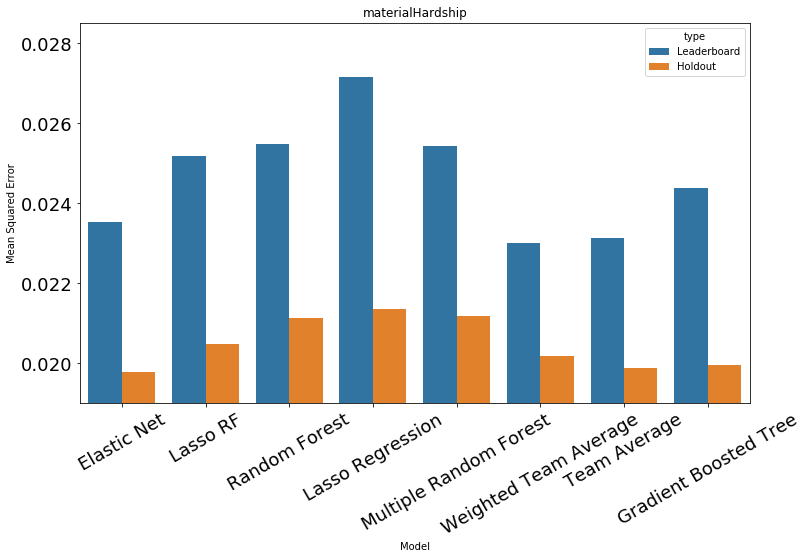

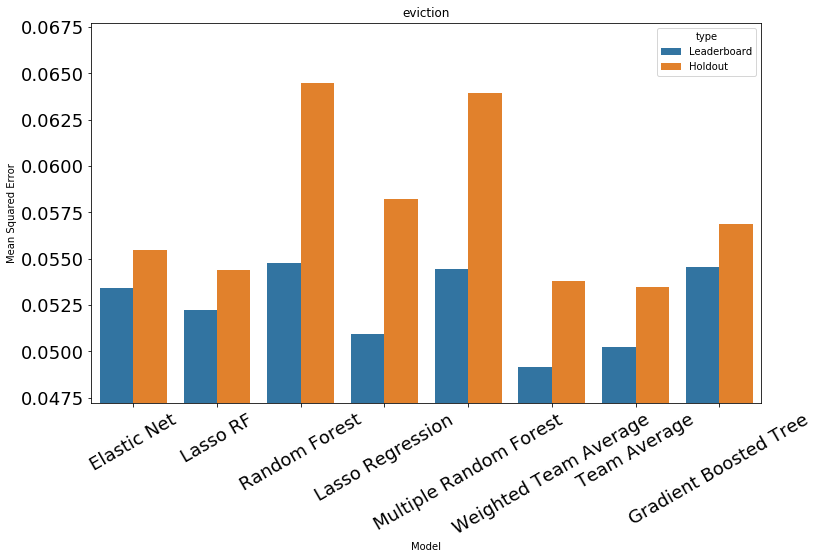

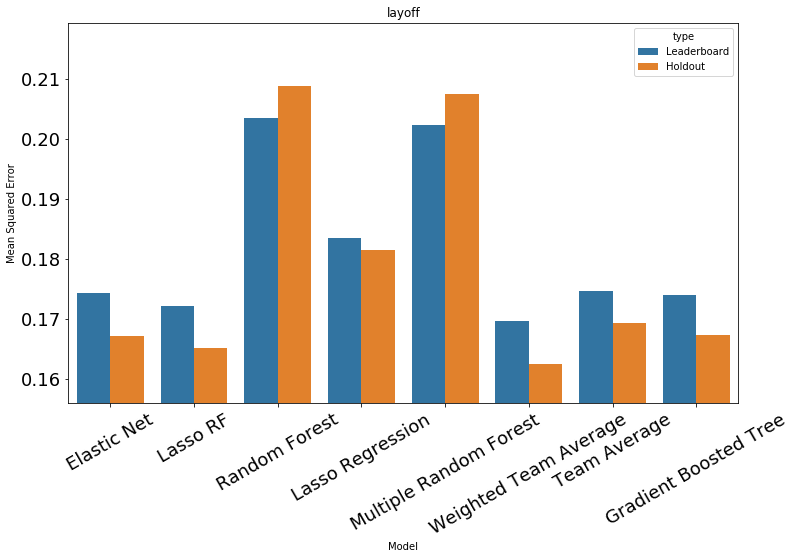

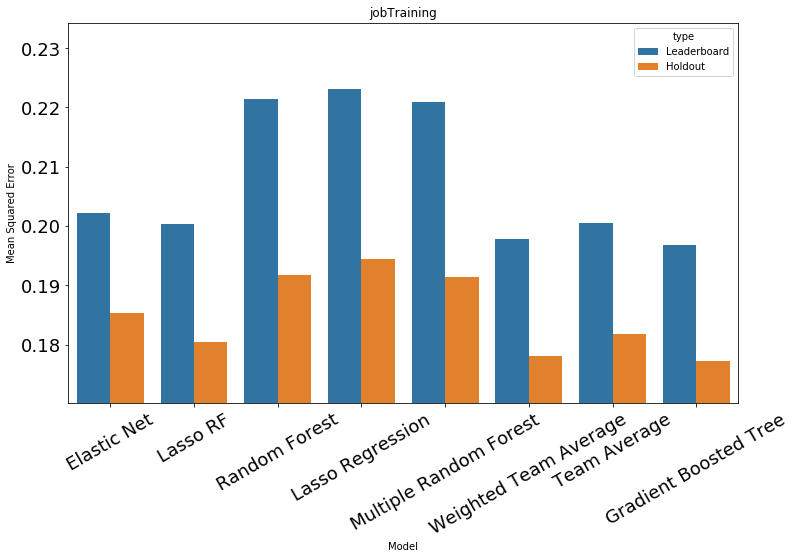

In [58]:
for OUTCOME in training.columns.values:
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7), sharex=True)

    sns.barplot('model','score_avg',hue = 'type', data = scores_noIS.loc[scores_noIS.outcome==OUTCOME],
                ci = 'sd',ax=ax)
    #ax.set_yscale('log')
    #ax.set_ylim(0.32,0.4)
    ax.set_title(str(OUTCOME))
    ax.set_ylim((0.96*min(scores_noIS.loc[scores_noIS.outcome==OUTCOME].score_avg),1.05*max(scores_noIS.loc[scores_noIS.outcome==OUTCOME].score_avg)))
    ax.set_xlabel('Model')
    ax.set_ylabel('Mean Squared Error')
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=30)
    ax.tick_params(labelsize=18)
    plt.savefig(str('fig/'+OUTCOME+'.pdf'))
    bools_L = (scores_noIS.type=='Leaderboard') & (scores_noIS.outcome==OUTCOME)
    bools_H = (scores_noIS.type=='Holdout') & (scores_noIS.outcome==OUTCOME)
    print(OUTCOME)
    print('Best Leaderboard Model: ',scores_noIS.loc[(bools_L)&(scores_noIS.loc[bools_L].score_avg==min(scores_noIS.loc[bools_L].score_avg))].model)
    print('Best Holdout Model: ',scores_noIS.loc[(bools_H)&(scores_noIS.loc[bools_H].score_avg==min(scores_noIS.loc[bools_H].score_avg))].model)
    print()



In [27]:
scores.to_csv('compiled_scores.csv')

In [28]:
scores_IS = scores.loc[scores.type=='In-Sample Error']

gpa
Best In-Sample Model:  Index(['Lasso Regression'], dtype='object', name='model')

grit
Best In-Sample Model:  Index(['Lasso Regression'], dtype='object', name='model')

materialHardship
Best In-Sample Model:  Index(['Gradient Boosted Tree'], dtype='object', name='model')

eviction
Best In-Sample Model:  Index(['Random Forest'], dtype='object', name='model')

layoff
Best In-Sample Model:  Index(['Multiple Random Forest'], dtype='object', name='model')

jobTraining
Best In-Sample Model:  Index(['Lasso Regression'], dtype='object', name='model')



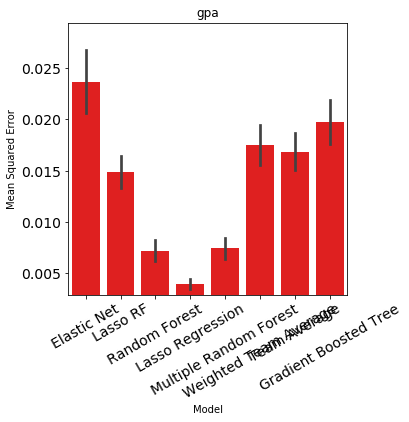

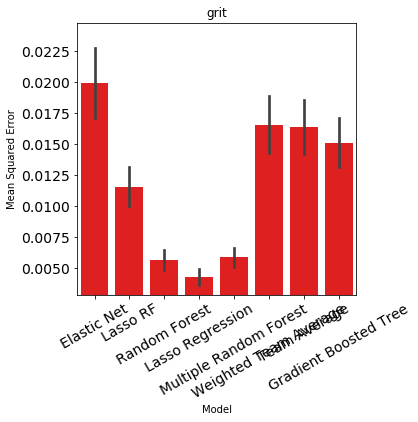

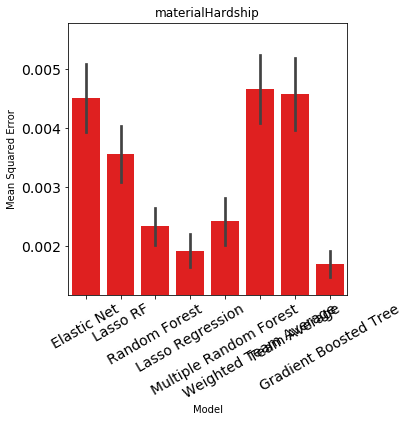

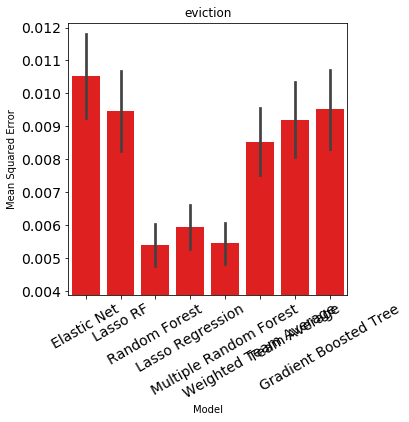

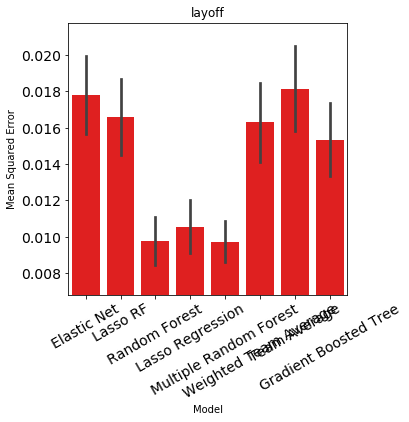

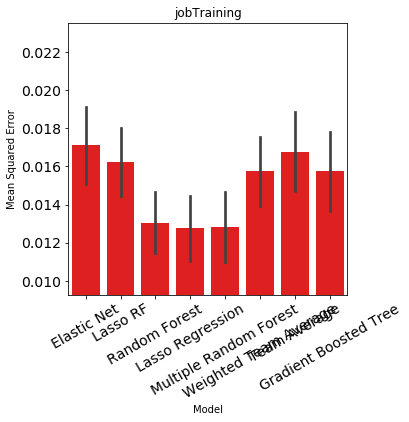

In [69]:
for OUTCOME in training.columns.values:
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=True)

    sns.barplot('model','score_avg', data = scores_IS.loc[scores_IS.outcome==OUTCOME],
                ci = 'sd',ax=ax, color = 'red')
    #ax.set_yscale('log')
    #ax.set_ylim(0.32,0.4)
    ax.set_title(str(OUTCOME))
    ax.set_ylim((0.96*min(scores_IS.loc[scores_IS.outcome==OUTCOME].score_avg),0.9*max(scores_IS.loc[scores_IS.outcome==OUTCOME].score_avg)))
    ax.set_xlabel('Model')
    ax.set_ylabel('Mean Squared Error')
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=30)
    ax.tick_params(labelsize=14)
    plt.savefig(str('fig/'+OUTCOME+'IS.pdf'))

    bools = (scores_IS.outcome==OUTCOME)
    print(OUTCOME)    
    print('Best In-Sample Model: ', scores_IS.loc[bools].groupby(scores_IS.model).mean().index[scores_IS.loc[bools].groupby(scores_IS.model).mean().score_avg==min(scores_IS.loc[bools].groupby(scores_IS.model).mean().score_avg)])
    print()
    



## Feature Importance XGBoost

In [92]:
father = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Father'],'score': [0.199531305,0.140893472,0.221546773,0.1923971,0.130434782,0.27181208]})

homevisit = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Home Visit'],'score': [0.203213929,0.209621994,0.189125295,0.112949541,0.036789297,0.187919463]})

child = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Child'],'score': [0.044861065,0.003436426,0.082404594,0.01572542,0.006688963,0.023489933]})

kinder = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Kindergarden'],'score': [0.003347841,0.003436426,0.00810537,0.008432472,0.003344482,0.006711409]})

mother = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Mother'],'score': [0.349849352,0.515463913,0.360351229,0.569032313,0.66889632,0.395973155]})

other = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Other'],'score': [0.016069635,0.01718213,0.003377237,0.0097999,0.006688963,0.016778523]})

care = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Caregiver'],'score': [0.085369937,0.048109966,0.10570753,0.060713797,0.140468227,0.080536912]})

teacher = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Teacher'],'score': [0.087378641,0.058419244,0.023302938,0.02306395,0.006688963,0.016778524]})


wav1 = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Wave 1'],'score': [0.109809175,0.048109966,0.101654846,0.317288843,0.046822742,0.104026846]})

wav2 = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Wave 2'],'score': [0.126548378,0.085910654,0.125295507,0.122612698,0.117056855,0.073825504]})

wav3 = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Wave 3'],'score': [0.189822567,0.206185568,0.173252278,0.162496011,0.143812707,0.271812079]})

wav4 = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Wave 4'],'score': [0.172079012,0.230240552,0.205336034,0.166826199,0.217391305,0.241610739]})

wav5 = pd.DataFrame({'outcome': ['gpa','eviction','grit','materialHardship','jobTraining','layoff'],
          'characteristic': 6*['Wave 5'],'score': [0.388014734,0.422680407,0.380276931,0.214458269,0.471571907,0.302013422]})





who_df = pd.concat([mother,father,care,homevisit,child,teacher,kinder,other],ignore_index = True)
when_df = pd.concat([wav1,wav2,wav3,wav4,wav5],ignore_index = True)

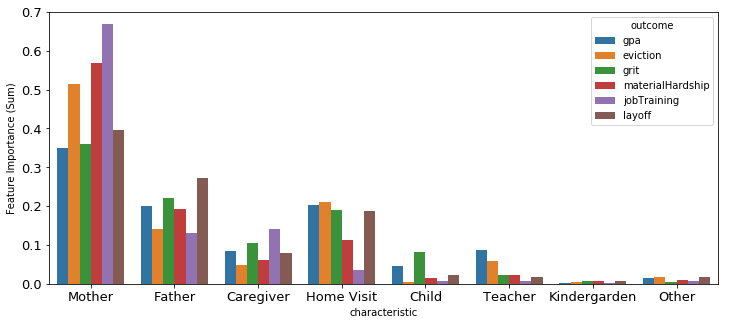

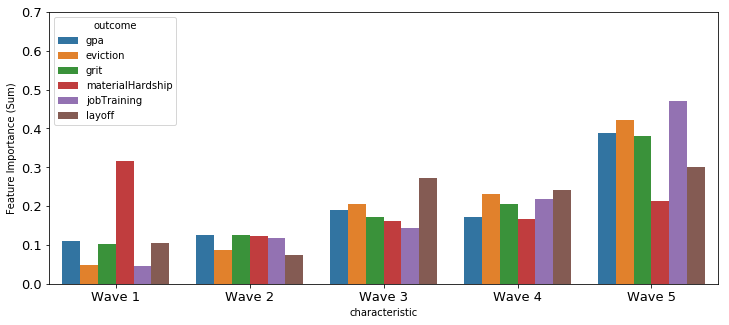

In [99]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True)

sns.barplot('characteristic','score', hue = 'outcome', data = who_df,
            ci = None,ax=ax)

ax.set_ylabel('Feature Importance (Sum)')
ax.tick_params(labelsize=13)
ax.set_ylim(0,0.7)
plt.savefig('fig/Who_Feature_Importance.pdf')


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True)

sns.barplot('characteristic','score', hue = 'outcome', data = when_df,
            ci = None,ax=ax)

ax.set_ylabel('Feature Importance (Sum)')
ax.tick_params(labelsize=13)
ax.set_ylim(0,0.7)
plt.savefig('fig/When_Feature_Importance.pdf')